# Sentinel-1 explore rangelands dynamics
### This notebook reads in Sentinel-1 radar backscatter and dual-polarimetric decomposition for an area of interest in the rangelands areas of Western Australia. MORE DETAILS HERE ...

## For this notebook to work you must first load the relevant modules
###  module use /g/data/v10/public/modules/modulefiles
###  module load dea

### Note that Sentinel-1 is currently only processed for portions of Australia

In [1]:
#%matplotlib inline
#import datacube
#import numpy as np
#from datacube.helpers import write_geotiff
%pylab notebook

import datacube
import numpy as np
import xarray as xr
from datacube.storage import masking
from datacube.storage.masking import mask_to_dict
from matplotlib import pyplot as plt
from IPython.display import display
import ipywidgets as widgets

#import sys
#sys.path

Populating the interactive namespace from numpy and matplotlib


In [2]:
dc = datacube.Datacube(config='radar.conf')

# View Product List & Details

In [3]:
dc.list_products()

name  \
id                                 
5                       dsm1sv10   
35   fc_percentile_albers_annual   
1             high_tide_comp_20p   
2           high_tide_comp_count   
12                       item_v2   
13                  item_v2_conf   
3              low_tide_comp_20p   
4            low_tide_comp_count   
6                  ls5_fc_albers   
37              ls5_level1_scene   
54               ls5_nbar_albers   
38                ls5_nbar_scene   
58              ls5_nbart_albers   
31    ls5_nbart_geomedian_annual   
39               ls5_nbart_scene   
50                 ls5_pq_albers   
41           ls5_pq_legacy_scene   
40                  ls5_pq_scene   
36  ls5_satellite_telemetry_data   
7                  ls7_fc_albers   
43              ls7_level1_scene   
57               ls7_nbar_albers   
44                ls7_nbar_scene   
51              ls7_nbart_albers   
30    ls7_nbart_geomedian_annual   
45               ls7_nbart_scene   
53                 ls7_pq_albers   
47           ls7_pq_legacy_scene   
46                  ls7_pq_scene   
42  ls7_satellite_telemetry_data   
..                           ...   
20                ls8_nbar_scene   
60              ls8_nbart_albers   
29    ls8_nbart_geomedian_annual   
56          ls8_nbart_oli_albers   
26           ls8_nbart_oli_scene   
21               ls8_nbart_scene   
55                 ls8_pq_albers   
28       ls8_pq_legacy_oli_scene   
23           ls8_pq_legacy_scene   
59             ls8_pq_oli_albers   
27              ls8_pq_oli_scene   
22                  ls8_pq_scene   
18  ls8_satellite_telemetry_data   
17  mangrove_extent_cover_albers   
15       pq_count_annual_summary   
32              pq_count_summary   
61               s1_gamma0_scene   
64           s1_gamma0_scene_odc   
65            s1_gamma0_scene_v2   
62              s1_haalpha_scene   
66         s1_haalpha_scene_test   
67        s1_haalpha_scene_test2   
33               s2a_ard_granule   
9            s2a_level1c_granule   
11           s2a_sen2cor_granule   
34               s2b_ard_granule   
10           s2b_level1c_granule   
48                   wofs_albers   
14         wofs_filtered_summary   
16                  wofs_summary   

                                          description  sat_path  \
id                                                                
5                                DSM 1sec Version 1.0       NaN   
35  Landsat Fractional Cover percentile 25 metre, ...       NaN   
1   High Tide 20 percentage composites for entire ...       NaN   
2                 High Tide 20 percentage pixel count       NaN   
12                           Intertidal Extents Model       NaN   
13                    Average ndwi Standard Deviation       NaN   
3   Low Tide 20 percentage composites for entire c...       NaN   
4                  Low Tide 20 percentage pixel count       NaN   
6   Landsat 5 Fractional Cover 25 metre, 100km til...       NaN   
37      Landsat 5 Level 1 At-sensor Radiance 25 metre       NaN   
54  Landsat 5 Surface Reflectance NBAR 25 metre, 1...       NaN   
38                            Landsat 5 NBAR 25 metre       NaN   
58  Landsat 5 Surface Reflectance NBART 25 metre, ...       NaN   
31  Surface Reflectance Geometric Median 25 metre,...       NaN   
39                           Landsat 5 NBART 25 metre       NaN   
50  Landsat 5 Pixel Quality 25 metre, 100km tile, ...       NaN   
41                       Landsat 5 PQ Legacy 25 metre       NaN   
40                              Landsat 5 PQ 25 metre       NaN   
36                 Landsat 5 Satellite Telemetry Data       NaN   
7   Landsat 7 Fractional Cover 25 metre, 100km til...       NaN   
43      Landsat 7 Level 1 At-sensor Radiance 25 metre       NaN   
57  Landsat 7 Surface Reflectance NBAR 25 metre, 1...       NaN   
44                            Landsat 7 NBAR 25 metre       NaN   
51  Landsat 7 Surface Reflectance NBART 25 metre, ...       NaN   
30  Surface Refle

# Load data over area of interest for year 
## (2017 or 2018 for full years)

In [70]:
# For lat/lon (test area 1 - upper Fitzroy Floodplain)
query = {
'y': (-18.6, -18.4),
'x': (125.0, 125.2),
'time': ('2017-01-01','2018-01-01'),
'crs': 'EPSG:4326',
'output_crs': 'EPSG: 3577',
'resolution': (25, -25)
}

In [3]:
# For Lat / Lon (test area 2 - SE of Fitzroy Floodplain)
query = {
'y': (-19.3, -19.1),
'x': (125.3, 125.8),
'time': ('2017-01-01','2018-01-01'),
'crs': 'EPSG:4326',
'output_crs': 'EPSG: 3577',
'resolution': (25, -25)
}

In [74]:
# For lat/lon (test area 3 - lower Fitzroy Floodplain)
query = {
'y': (-18.6, -18.4),
'x': (125.8, 126.0),
'time': ('2017-01-01','2018-01-01'),
'crs': 'EPSG:4326',
'output_crs': 'EPSG: 3577',
'resolution': (25, -25)
}

# Read radar backscatter

In [75]:
bs=dc.load(product='s1_gamma0_scene_v2', group_by='solar_day', **query)
bs

<xarray.Dataset>
Dimensions:  (time: 29, x: 886, y: 926)
Coordinates:
  * time     (time) datetime64[ns] 2017-01-06T21:06:37.067738 ... 2017-12-20T21:06:46.267397
  * y        (y) float64 -2.004e+06 -2.004e+06 ... -1.981e+06 -1.981e+06
  * x        (x) float64 -6.321e+05 -6.321e+05 ... -6.542e+05 -6.542e+05
Data variables:
    vh       (time, y, x) float32 0.006555338 0.009128214 ... 0.0035425948
    vv       (time, y, x) float32 0.10862086 0.07968879 ... 0.072011895
Attributes:
    crs:      EPSG: 3577

# Remove scenes that are mostly nulls

In [76]:
# Uses Fang's code

total_px=len(bs.x)*len(bs.y)
valid=bs.where(bs.vv!=0).where(bs.vh!=0).count(dim=('x','y'))

good=(valid.vh/total_px)>0.5
good.sum()

<xarray.DataArray 'vh' ()>
array(29)

In [77]:
bs_good = bs.sel(time=good)
# replace 0 with nan
bs_clean = bs_good.where(bs_good!=0)
bs_clean

<xarray.Dataset>
Dimensions:  (time: 29, x: 886, y: 926)
Coordinates:
  * time     (time) datetime64[ns] 2017-01-06T21:06:37.067738 ... 2017-12-20T21:06:46.267397
  * y        (y) float64 -2.004e+06 -2.004e+06 ... -1.981e+06 -1.981e+06
  * x        (x) float64 -6.321e+05 -6.321e+05 ... -6.542e+05 -6.542e+05
Data variables:
    vh       (time, y, x) float32 0.006555338 0.009128214 ... 0.0035425948
    vv       (time, y, x) float32 0.10862086 0.07968879 ... 0.072011895
Attributes:
    crs:      EPSG: 3577

# Apply speckle filter (copied from Fang's code)

In [7]:
# Adapted from https://stackoverflow.com/questions/39785970/speckle-lee-filter-in-python

from scipy.ndimage.filters import uniform_filter
from scipy.ndimage.measurements import variance

def lee_filter(da, size):
    img = da.values
    img_mean = uniform_filter(img, (size, size))
    img_sqr_mean = uniform_filter(img**2, (size, size))
    img_variance = img_sqr_mean - img_mean**2

    overall_variance = variance(img)

    img_weights = img_variance / (img_variance + overall_variance)
    img_output = img_mean + img_weights * (img - img_mean)
    return img_output

In [8]:
# Convert backscatter nans to 0 for lee filter (Fang's code)

# save the nodata mask
nodata_mask = bs_clean.isnull().to_array().any(axis=0)
# replace nan with 0
bs_good_zerofilled = bs_good.where(~bs_good.isnull(), 0)
bs_good_zerofilled

<xarray.Dataset>
Dimensions:  (time: 29, x: 2140, y: 994)
Coordinates:
  * time     (time) datetime64[ns] 2017-01-06T21:06:37.067738 ... 2017-12-20T21:06:46.267397
  * y        (y) float64 -2.085e+06 -2.085e+06 ... -2.06e+06 -2.06e+06
  * x        (x) float64 -6.494e+05 -6.494e+05 ... -7.028e+05 -7.028e+05
Data variables:
    vh       (time, y, x) float32 0.002649679 0.00816848 ... 0.003058286
    vv       (time, y, x) float32 0.043771613 0.031186916 ... 0.042304903
Attributes:
    crs:      EPSG: 3577

In [9]:
# Apply speckle filter

smoothed_vv=bs_good_zerofilled.vv.groupby('time').apply(lee_filter, size=7)
smoothed_vh=bs_good_zerofilled.vh.groupby('time').apply(lee_filter, size=7)

In [10]:
# Create smoothed dataset with Nans and assign attributes

smoothed=smoothed_vv.to_dataset(name='vv')
smoothed['vh']=smoothed_vh
smoothed=smoothed.where(~nodata_mask)

In [11]:
# Remove unused data
bs_attrs = bs.attrs
smoothed = smoothed.assign_attrs(bs_attrs)

del bs, bs_good, bs_clean

<IPython.core.display.Javascript object>


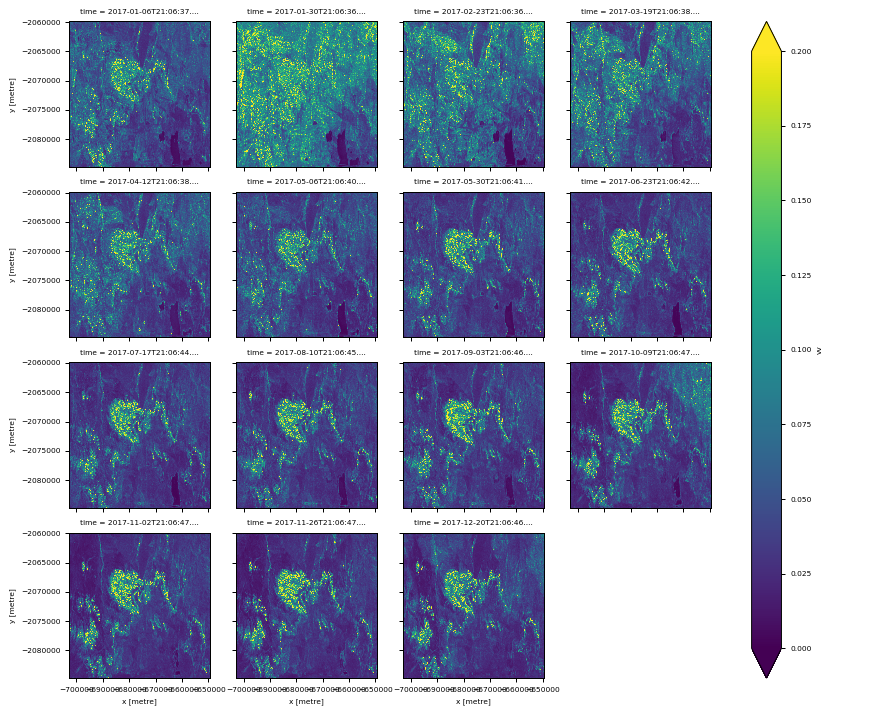

In [12]:
# View smoothed data (Note - you might need to edit 'figsize' if dimensions are incorrect)
pylab.rcParams['font.size']=6

ntimes=len(smoothed.time.values)
smoothed.vv.isel(time=slice(0,ntimes,2)).plot(col='time',col_wrap=4, vmin=0, vmax=0.2, figsize=(10,8))

In [13]:
# Calculate vv-vh difference
#smoothed['vv_minus_vh'] = smoothed.vv - smoothed.vh

# Calculate a modified dual-pol Radar Vegetation Index
smoothed['RVI'] = 4*smoothed.vh/(smoothed.vv + smoothed.vh)

<IPython.core.display.Javascript object>


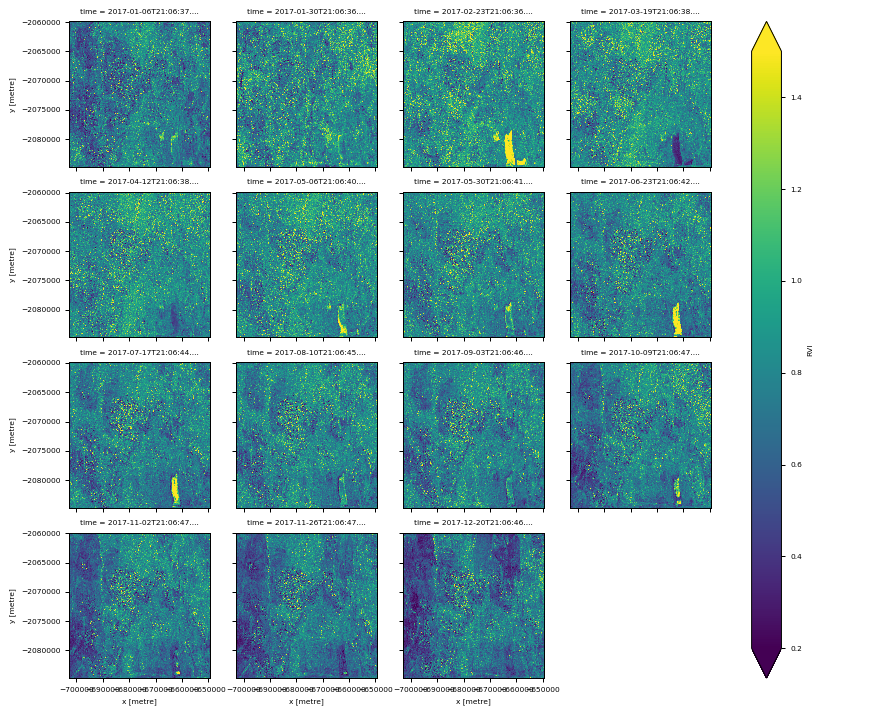

In [14]:
# View RVI data

ntimes=len(smoothed.time.values)
smoothed.RVI.isel(time=slice(0,ntimes,2)).plot(col='time',col_wrap=4, vmin=0.2, vmax=1.5, figsize=(10,8))

# Read in dual-pol decomp

In [15]:
dp=dc.load(product='s1_haalpha_scene', group_by='solar_day', **query)

In [16]:
## NEED TO TEST FURTHER ##
# fill null values so they are ignored
#from datacube.storage.masking import mask_invalid_data
#dp_test = dp.fillna(0)
#dp_test2 = mask_invalid_data(dp_test)
#dp_test2

dp = dp.where(dp.entropy!=0) # to remove remaining nulls (that currently exist as '0')

# Read in same dates as bs
#dp_good = dp.sel(time=smoothed['time.dayofyear'])
#dp_test=dp
#dp_test = dp.where(dp.time==smoothed.time)
#dp_test = dp.where(dp['time.dayofyear']==smoothed['time.dayofyear'])
#dp_test = dp.sel(time=dp.where(dp['time.dayofyear']==smoothed['time.dayofyear']))

#dp_test['time.dayofyear']=smoothed['time.dayofyear']
#test=dp.time[0]
#str(test.data)[0:10]

#smoothed['time.dayofyear']
#good_dates=dp.where(dp['time.dayofyear']==smoothed['time.dayofyear'])
#good_dates.sum()

dp['time.dayofyear']
#dp_test['time.dayofyear']
#dp_test

<xarray.DataArray 'dayofyear' (time: 29)>
array([  6,  18,  30,  42,  54,  66,  78,  90, 102, 114, 126, 138, 150, 162,
       174, 186, 198, 210, 222, 234, 246, 270, 282, 294, 306, 318, 330, 342,
       354])
Coordinates:
  * time     (time) datetime64[ns] 2017-01-06T21:06:37.194455 ... 2017-12-20T21:06:46.495604

<IPython.core.display.Javascript object>


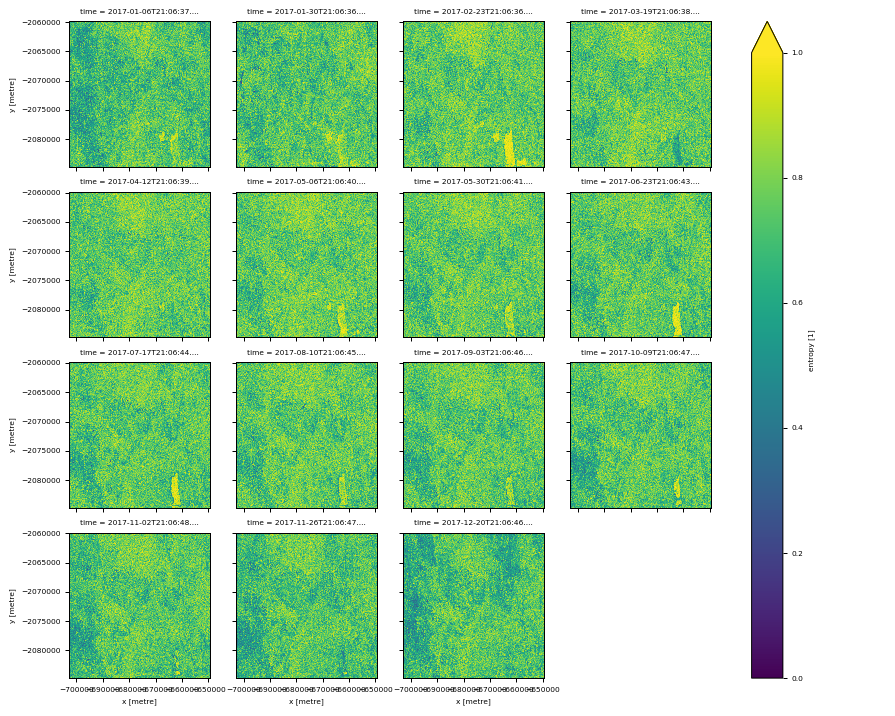

In [17]:
# View entropy (values ~0-1.0) data (can also change to look at 'alpha' (values ~40-80) or 'anisotropy' (values ~0-1.0))
ntimes=len(dp.time.values)
dp.entropy.isel(time=slice(0,ntimes,2)).plot(col='time',col_wrap=4, vmin=0, vmax=1.0, figsize=(10,8))

# Load Sentinel-2 to extract NDVI time series

In [18]:
dc_S2 = datacube.Datacube(app='dc-S2-extract')
products = dc_S2.list_products()
products

name  \
id                                  
36             bom_rainfall_grids   
88                            dsm   
32                       dsm1sv10   
99    fc_percentile_albers_annual   
53                      gamma_ray   
63             high_tide_comp_20p   
64           high_tide_comp_count   
67                        item_v2   
68                   item_v2_conf   
65              low_tide_comp_20p   
66            low_tide_comp_count   
69                  ls5_fc_albers   
2                ls5_level1_scene   
6                 ls5_nbar_albers   
3                  ls5_nbar_scene   
26               ls5_nbart_albers   
83     ls5_nbart_geomedian_annual   
4                 ls5_nbart_scene   
23                  ls5_pq_albers   
75            ls5_pq_legacy_scene   
5                    ls5_pq_scene   
1    ls5_satellite_telemetry_data   
94                  ls5_usgs_l2c1   
70                  ls7_fc_albers   
9                ls7_level1_scene   
21                ls7_nbar_albers   
10                 ls7_nbar_scene   
29               ls7_nbart_albers   
82     ls7_nbart_geomedian_annual   
11                ls7_nbart_scene   
..                            ...   
15                 ls8_nbar_scene   
28               ls8_nbart_albers   
81     ls8_nbart_geomedian_annual   
61           ls8_nbart_oli_albers   
58            ls8_nbart_oli_scene   
16                ls8_nbart_scene   
20                  ls8_pq_albers   
74        ls8_pq_legacy_oli_scene   
73            ls8_pq_legacy_scene   
80              ls8_pq_oli_albers   
59               ls8_pq_oli_scene   
17                   ls8_pq_scene   
13   ls8_satellite_telemetry_data   
96                  ls8_usgs_l2c1   
87                          modis   
86                          mrvbf   
78        pq_count_annual_summary   
79               pq_count_summary   
90                s2a_ard_granule   
92            s2a_level1c_granule   
91                s2b_ard_granule   
93            s2b_level1c_granule   
56                 srtm_dem1sv1_0   
89                    urban_areas   
77                    wofs_albers   
97            wofs_annual_summary   
100          wofs_apr_oct_summary   
85          wofs_filtered_summary   
101          wofs_nov_mar_summary   
84                   wofs_summary   

                                           description  \
id                                                       
36   Interpolated Rain Gauge Precipitation 1-Day Au...   
88   dsm ancillary data for wofs confidence, 25 met...   
32                                DSM 1sec Version 1.0   
99   Landsat Fractional Cover percentile 25 metre, ...   
53   The 2015 radiometric or gamma-ray grid of Aust...   
63   High Tide 20 percentage composites for entire ...   
64                 High Tide 20 percentage pixel count   
67                            Intertidal Extents Model   
68                     Average ndwi Standard Deviation   
65   Low Tide 20 percentage composites for entire c...   
66                  Low Tide 20 percentage pixel count   
69   Landsat 5 Fractional Cover 25 metre, 100km til...   
2        Landsat 5 Level 1 At-sensor Radiance 25 metre   
6    Landsat 5 Surface Reflectance NBAR 25 metre, 1...   
3                              Landsat 5 NBAR 25 metre   
26   Landsat 5 Surface Reflectance NBART 25 metre, ...   
83   Surface Reflectance Geometric Median 25 metre,...   
4                             Landsat 5 NBART 25 metre   
23   Landsat 5 Pixel Quality 25 metre, 100km tile, ...   
75                        Landsat 5 PQ Legacy 25 metre   
5                                Landsat 5 PQ 25 metre   
1                   Landsat 5 Satellite Telemetry Data   
94   Landsat 5 Thematic Mapper (TM) USGS Analysis R...   
70   Landsat 7 Fractional Cover 25 metre, 100km til...   
9        Landsat 7 Level 1 At-sensor Radiance 25 metre   
21   Landsat 7 Surface Reflectance NBAR 25 metre, 1...   
10                             Landsat 7 NBAR 25 metre   
29   Landsat 7 

In [19]:
bands_of_interest = ['nbar_green', 'nbar_nir_2', 'fmask']
sensors = ['s2a','s2b']

s2 = {}
for sensor in sensors:
    s2[sensor] = dc_S2.load(product = sensor+'_ard_granule', group_by='solar_day', measurements = bands_of_interest, **query)
s2

/g/data/v10/public/modules/dea-env/20190329/lib/python3.6/site-packages/xarray/core/variable.py:134: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  return np.asarray(pd.Series(values.ravel())).reshape(values.shape)
/g/data/v10/public/modules/dea-env/20190329/lib/python3.6/site-packages/xarray/core/variable.py:134: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  return np.asarray(pd.Series

{'s2a': <xarray.Dataset>
 Dimensions:     (time: 19, x: 2140, y: 994)
 Coordinates:
   * time        (time) datetime64[ns] 2017-01-08T01:46:31.026000 ... 2017-12-24T01:46:51.026000
   * y           (y) float64 -2.085e+06 -2.085e+06 ... -2.06e+06 -2.06e+06
   * x           (x) float64 -6.494e+05 -6.494e+05 ... -7.028e+05 -7.028e+05
 Data variables:
     nbar_green  (time, y, x) int16 6846 6620 6886 6649 6530 ... 930 924 951 937
     nbar_nir_2  (time, y, x) int16 7662 7802 8062 8025 ... 2478 2574 2620 2572
     fmask       (time, y, x) uint8 2 2 2 2 2 2 2 2 2 2 2 ... 1 1 1 1 1 1 1 1 1 1
 Attributes:
     crs:      EPSG: 3577, 's2b': <xarray.Dataset>
 Dimensions:     (time: 12, x: 2140, y: 994)
 Coordinates:
   * time        (time) datetime64[ns] 2017-07-12T01:46:59.027000 ... 2017-12-29T01:46:49.027000
   * y           (y) float64 -2.085e+06 -2.085e+06 ... -2.06e+06 -2.06e+06
   * x           (x) float64 -6.494e+05 -6.494e+05 ... -7.028e+05 -7.028e+05
 Data variables:
     nbar_green  (

In [22]:
## SORTING DOESNT WORK  - still in order of s2a and s2b ##
s2_clean = xr.concat(s2.values(), dim='time')
time_sorted = s2_clean.time.argsort()
#s2_clean = s2_clean.isel(time=time_sorted)

time_sorted

del s2

<IPython.core.display.Javascript object>


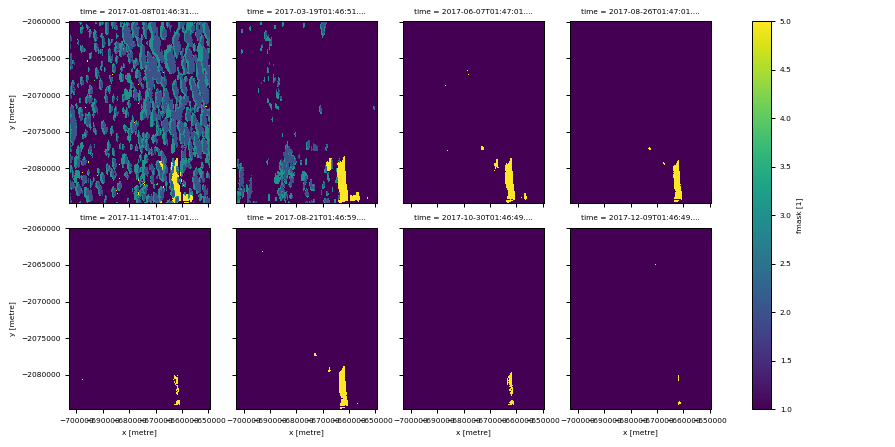

In [23]:
ntimes=len(s2_clean.time.values)
s2_clean.fmask.isel(time=slice(0,ntimes,4)).plot(col='time', col_wrap=4, figsize=(10,5))

In [24]:
# Remove clouds and nulls from S2 data
nbar_green = s2_clean.nbar_green
s2_good=nbar_green.to_dataset(name='green')
s2_good['nir']=s2_clean.nbar_nir_2
s2_good['fmask']=s2_clean.fmask

s2_good_temp = s2_good.where(s2_good.fmask<2) # to remove cloud/shadow/nulls based on fmask
s2_good_clean = s2_good_temp.where(s2_good_temp.fmask!=0)

# Create NDVI band
s2_good_clean['ndvi']=(s2_good_clean.nir.astype(float) - s2_good_clean.green.astype(float))/(s2_good_clean.nir.astype(float) + s2_good_clean.green.astype(float))

s2_good_clean = s2_good_clean.assign_attrs(bs_attrs)

del s2_good
s2_good_clean

<xarray.Dataset>
Dimensions:  (time: 31, x: 2140, y: 994)
Coordinates:
  * y        (y) float64 -2.085e+06 -2.085e+06 ... -2.06e+06 -2.06e+06
  * x        (x) float64 -6.494e+05 -6.494e+05 ... -7.028e+05 -7.028e+05
  * time     (time) datetime64[ns] 2017-01-08T01:46:31.026000 ... 2017-12-29T01:46:49.027000
Data variables:
    green    (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan nan
    nir      (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan nan
    fmask    (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan nan
    ndvi     (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    crs:      EPSG: 3577

In [ ]:
## NEED TO REMOVE MOSTLY NULL IMAGES AND FURTHER CLEANING ON RESULTS (CLOUDS STILL APPARENT IN IMAGES)

<IPython.core.display.Javascript object>


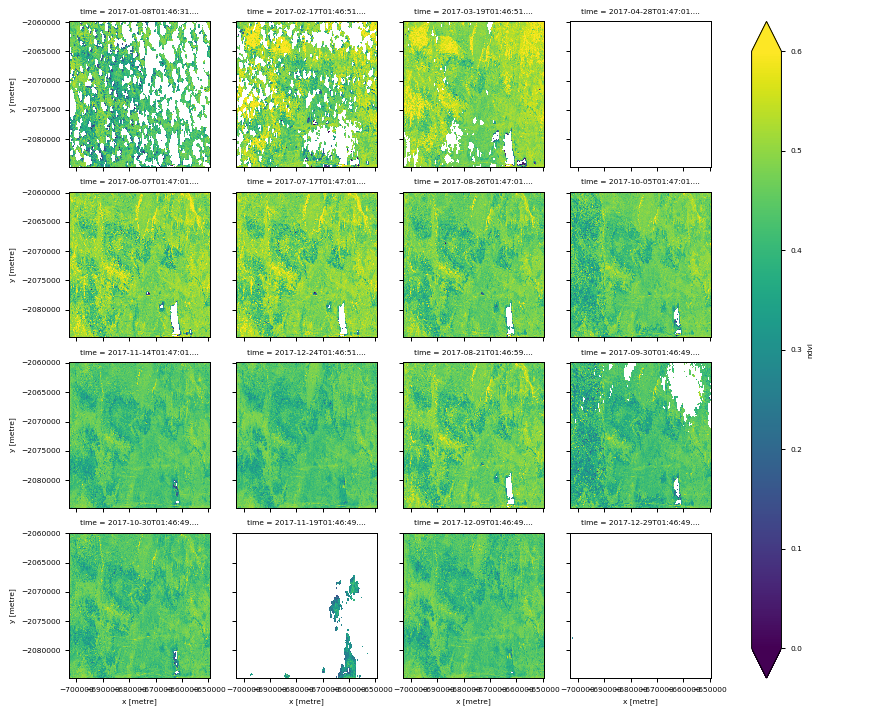

In [26]:
# View S2 NDVI time series
ntimes=len(s2_good_clean.time.values)
s2_good_clean.isel(time=slice(0,ntimes,2)).ndvi.plot(col='time', col_wrap=4, vmin=0.0, vmax=0.6, figsize=(10,8))

# Select area of interest interactively to look at RVI, Entropy and NDVI time series

In [27]:
def onclick(event):
    global pixelx, pixely
    x, y = int(event.xdata), int(event.ydata)
    image_coords = smoothed.affine * (x, y)
    pixelx = x #int(image_coords[0])
    pixely = y #int(image_coords[1])
    w.value = 'pixelx : {}, pixely : {}'.format(pixelx, pixely)

Click on the pixel you would like to interrogate


<IPython.core.display.Javascript object>


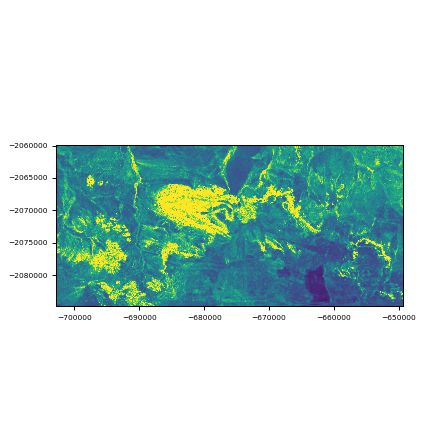

HTML(value='Click on the pixel you would like to interrogate')

In [28]:
print('\033[1m' + 'Click on the pixel you would like to interrogate' + '\033[0m')

fig = plt.figure(figsize = (5,5))
plt.imshow(np.flip(smoothed.vv.mean(dim='time')), interpolation = 'nearest', clim=(0,0.1), extent=[smoothed.coords['x'].min(), smoothed.coords['x'].max(), smoothed.coords['y'].min(), smoothed.coords['y'].max()]) 

w = widgets.HTML("Click on the pixel you would like to interrogate")

cid = fig.canvas.mpl_connect('button_press_event', onclick)
display(w)

<IPython.core.display.Javascript object>


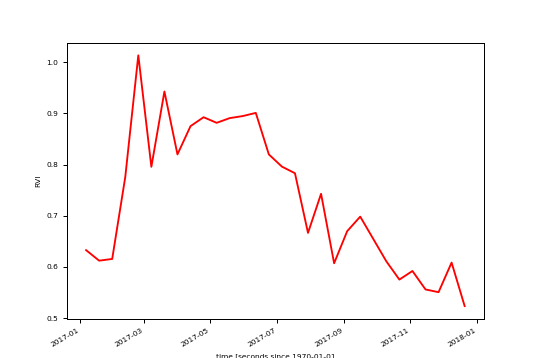

<IPython.core.display.Javascript object>


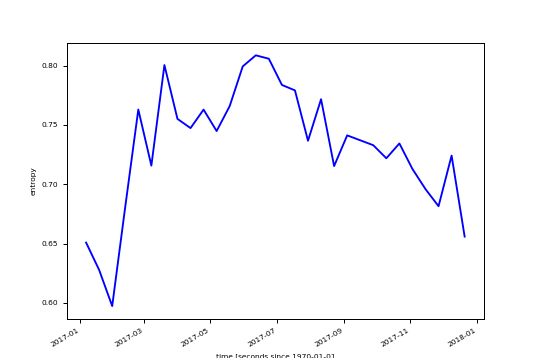

<IPython.core.display.Javascript object>


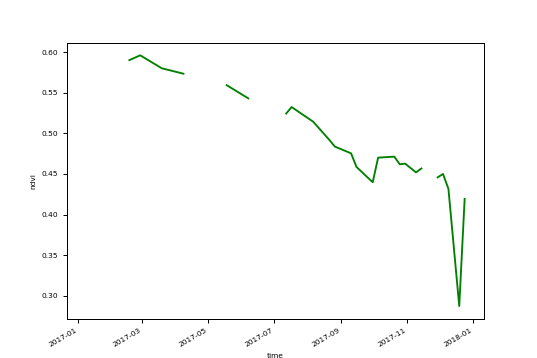

In [41]:
# plot RVI, Entropy and NDVI through time
from matplotlib import pyplot as plt

# expand selected x,y pixel to make a square area of interest
x3, y3=slice(pixelx+100,pixelx-100), slice(pixely-100,pixely+100) # for area 1

(smoothed.sel(x=x3,y=y3).RVI.groupby('time').mean()).plot(color='r', figsize=(6,4))
(dp.sel(x=x3,y=y3).entropy.groupby('time').mean()).plot(color='b', figsize=(6,4))
(s2_good_clean.sel(x=x3,y=y3).ndvi.groupby('time').mean()).plot(color='g', figsize=(6,4))

# Show Annual Statistics|

<IPython.core.display.Javascript object>


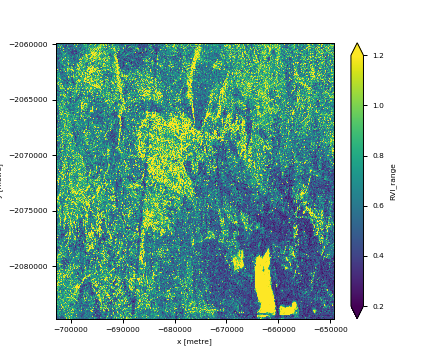

<IPython.core.display.Javascript object>


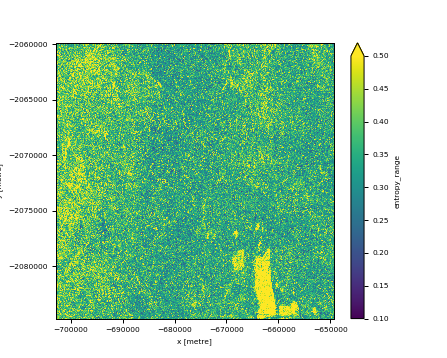

<IPython.core.display.Javascript object>


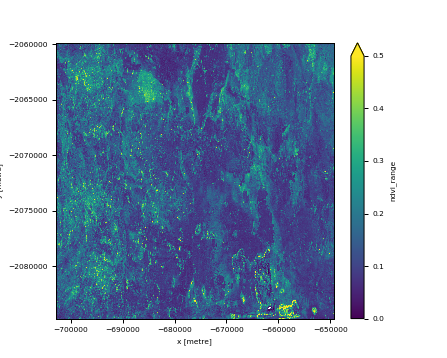

In [32]:
# Calculate annual range
from matplotlib import pyplot as plt

smoothed['RVI_range'] = smoothed.RVI.max(dim='time') - smoothed.RVI.min(dim='time')
dp['entropy_range'] = dp.entropy.max(dim='time') - dp.entropy.min(dim='time')
s2_good_clean['ndvi_range'] = s2_good_clean.ndvi.max(dim='time') - s2_good_clean.ndvi.min(dim='time')

smoothed.RVI_range.plot(vmin=0.2,vmax=1.2, figsize =(5,4))
dp.entropy_range.plot(vmin=0.1,vmax=0.5, figsize =(5,4))
s2_good_clean.ndvi_range.plot(vmin=0.0,vmax=0.5, figsize =(5,4))

<IPython.core.display.Javascript object>


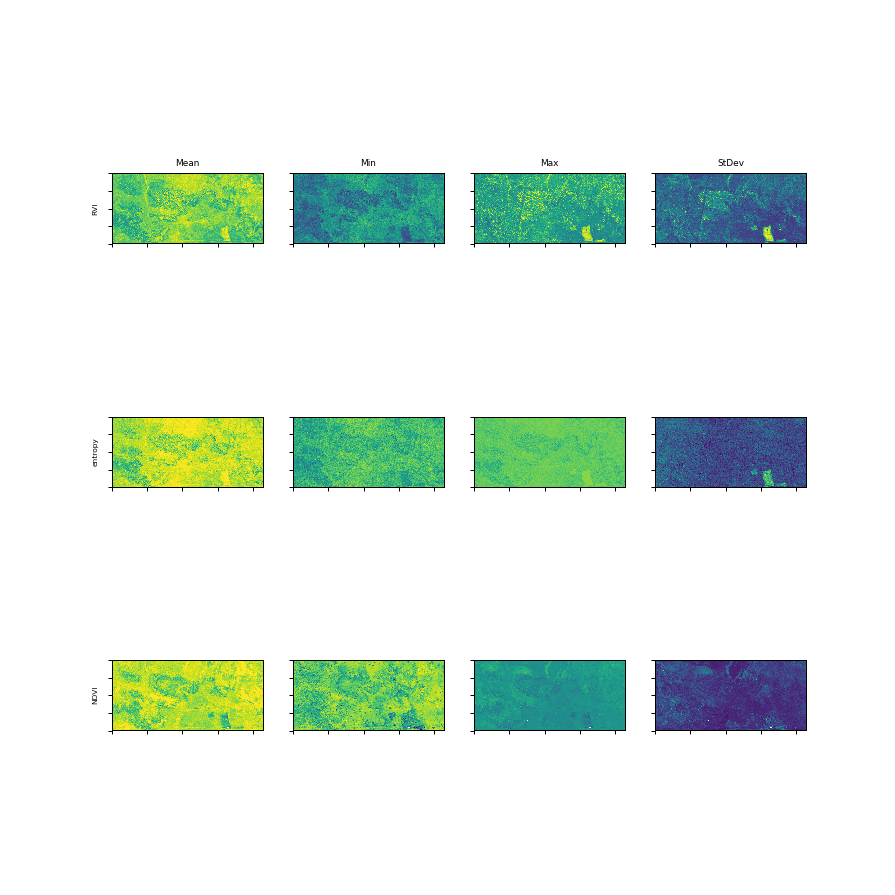

[]

In [33]:
# Option for multiple plots - note that the np image needs to be flipped

RVI_mean = np.flip(smoothed.RVI.mean(dim='time'))
RVI_min = np.flip(smoothed.RVI.min(dim='time'))
RVI_max = np.flip(smoothed.RVI.max(dim='time'))
RVI_std = np.flip(smoothed.RVI.std(dim='time'))

entropy_mean = np.flip(dp.entropy.mean(dim='time'))
entropy_min = np.flip(dp.entropy.min(dim='time'))
entropy_max = np.flip(dp.entropy.max(dim='time'))
entropy_std = np.flip(dp.entropy.std(dim='time'))

NDVI_mean = np.flip(s2_good_clean.ndvi.mean(dim='time'))
NDVI_min = np.flip(s2_good_clean.ndvi.min(dim='time'))
NDVI_max = np.flip(s2_good_clean.ndvi.max(dim='time'))
NDVI_std = np.flip(s2_good_clean.ndvi.std(dim='time'))

fix, ax = plt.subplots(3,4, figsize=(10,10))
ax[0,0].imshow(RVI_mean, clim=(0,1.0))
ax[0,0].set_title('Mean')
ax[0,0].set_ylabel('RVI')
ax[0,0].set_xticklabels([])
ax[0,0].set_yticklabels([])
ax[0,1].imshow(RVI_min, clim=(0,1.0))
ax[0,1].set_title('Min')
ax[0,1].set_xticklabels([])
ax[0,1].set_yticklabels([])
ax[0,2].imshow(RVI_max, clim=(0,2.0))
ax[0,2].set_title('Max')
ax[0,2].set_xticklabels([])
ax[0,2].set_yticklabels([])
ax[0,3].imshow(RVI_std, clim=(0,0.5))
ax[0,3].set_title('StDev')
ax[0,3].set_xticklabels([])
ax[0,3].set_yticklabels([])
ax[1,0].imshow(entropy_mean, clim=(0.2,0.8))
ax[1,0].set_ylabel('entropy')
ax[1,0].set_xticklabels([])
ax[1,0].set_yticklabels([])
ax[1,1].imshow(entropy_min, clim=(0,0.8))
ax[1,1].set_xticklabels([])
ax[1,1].set_yticklabels([])
ax[1,2].imshow(entropy_max, clim=(0,1.2))
ax[1,2].set_xticklabels([])
ax[1,2].set_yticklabels([])
ax[1,3].imshow(entropy_std, clim=(0.05,0.2))
ax[1,3].set_xticklabels([])
ax[1,3].set_yticklabels([])
ax[2,0].imshow(NDVI_mean, clim=(0.1,0.5))
ax[2,0].set_ylabel('NDVI')
ax[2,0].set_xticklabels([])
ax[2,0].set_yticklabels([])
ax[2,1].imshow(NDVI_min, clim=(0,0.5))
ax[2,1].set_xticklabels([])
ax[2,1].set_yticklabels([])
ax[2,2].imshow(NDVI_max, clim=(0,1.0))
ax[2,2].set_xticklabels([])
ax[2,2].set_yticklabels([])
ax[2,3].imshow(NDVI_std, clim=(0,0.2))
ax[2,3].set_xticklabels([])
ax[2,3].set_yticklabels([])

# Apply mask to remove non-rangeland areas

<IPython.core.display.Javascript object>


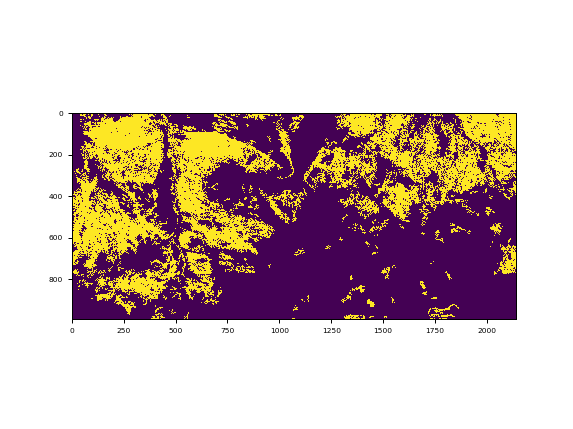

In [35]:
### NEED TO TIDY
arr_aoi = smoothed.vv.isel(time =1)
arr_aoi.shape

import ogr, gdal, osr

# Define pixel size and NoData value of new raster
xres = 25 #0.00025 #30 # same as original resolution of query
yres = 25 #0.00025 #30 # same as original resolution of query
NoData_value = 0 # -999

# Filename of shape file
vector_fn = '/home/599/cjt599/Demo_files/Area_Shapefiles/fromglc10v01_-20_124_GrasslandMask_25m_Seg100_Area2_Mask_Grasslands.shp'

# set the geotransform properties
#xcoord = smoothed.coords['longitude'].min()
#ycoord = smoothed.coords['latitude'].max()
#geotransform = (xcoord - (xres*0.5), xres, 0, ycoord + (yres*0.5), 0, yres)
xcoords = smoothed.isel(time=1).vv.indexes['x'] #indexes['longitude']
ycoords = smoothed.isel(time=1).vv.indexes['y'] #indexes['latitude']
MaxValX = xcoords.shape
MaxValY = ycoords.shape
geotransform = (xcoords[MaxValX[0]-1]-(xres*0.5), xres, 0, ycoords[MaxValY[0]-1]+(yres*0.5), 0, -yres)

# Open the data source and read in the extent
source_ds = ogr.Open(vector_fn)
source_layer = source_ds.GetLayer()
source_srs = source_layer.GetSpatialRef()
vx_min, vx_max, vy_min, vy_max = source_layer.GetExtent() # this is extent of Australia

# Create the destination extent
yt,xt = arr_aoi.shape # to be the same size as SAR images

# set up mask image including projection
target_ds = gdal.GetDriverByName('MEM').Create('', xt, yt, gdal.GDT_Byte)
target_ds.SetGeoTransform(geotransform) # this is the same as the NDVI diff LL geoTIFF
latlon = osr.SpatialReference() # establish encoding
latlon.ImportFromEPSG(3577) # to projection (4326 or 3577)
target_ds.SetProjection(latlon.ExportToWkt()) # export coords to file
band = target_ds.GetRasterBand(1)
band.SetNoDataValue(NoData_value)

# rasterise
gdal.RasterizeLayer(target_ds, [1], source_layer, burn_values=[1])

# Read as mask array
Mask_array = band.ReadAsArray()

fig = plt.figure()
plt.imshow(Mask_array)

<IPython.core.display.Javascript object>


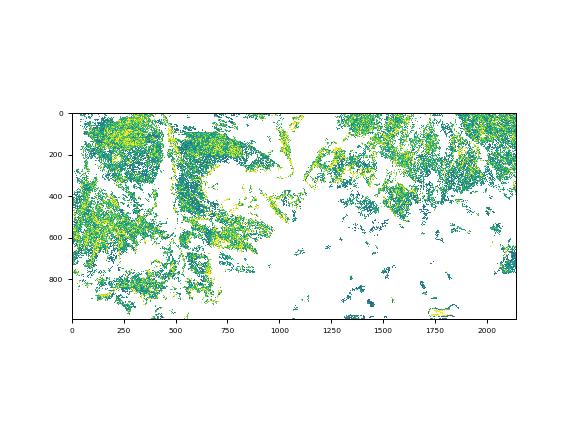

In [36]:
# Apply grassland mask to scene (note you need to np.flip image for xarray/numpy conversion)

smoothed_grassland = smoothed.where(np.flip(Mask_array==1))

fig = plt.figure()
plt.imshow(np.flip(smoothed_grassland.RVI_range), clim=(0,1.2))

<IPython.core.display.Javascript object>


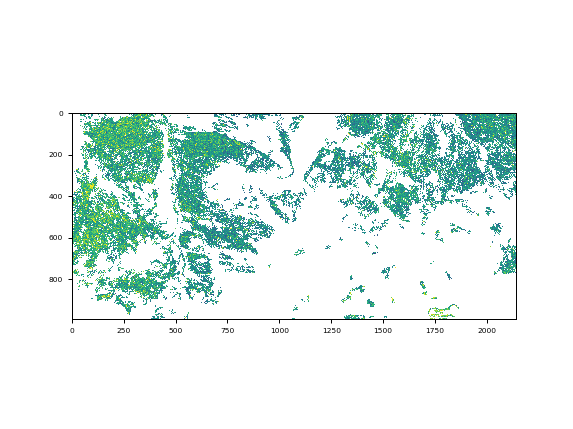

In [37]:
# Apply grassland mask to entropy scene (note you need to np.flip image for xarray/numpy conversion)

dp_grassland = dp.where(np.flip(Mask_array==1))

fig = plt.figure()
#plt.imshow(np.flip(dc_grassland.entropy.mean(dim='time')), clim=(0,0.9))
plt.imshow(np.flip(dp_grassland.entropy_range), clim=(0.1,0.6))

<IPython.core.display.Javascript object>


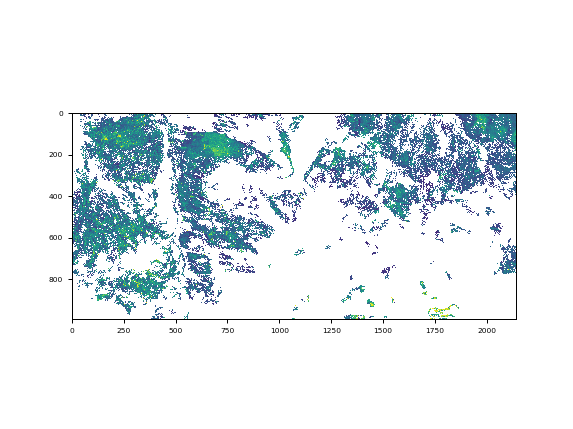

In [47]:
# Apply grassland mask to entropy scene (note you need to np.flip image for xarray/numpy conversion)

s2_good_clean_grassland = s2_good_clean.where(np.flip(Mask_array==1))

fig = plt.figure()
#plt.imshow(np.flip(dc_grassland.entropy.mean(dim='time')), clim=(0,0.9))
plt.imshow(np.flip(s2_good_clean_grassland.ndvi_range), clim=(0,0.5))

## Calculate monthly mean RVI images for grasslands

<IPython.core.display.Javascript object>


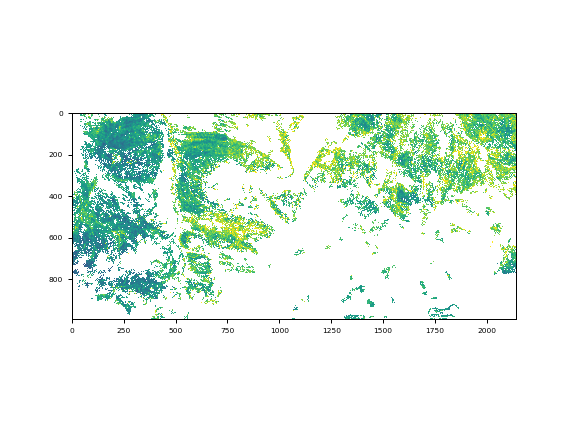

<xarray.Dataset>
Dimensions:  (x: 2140, y: 994)
Coordinates:
  * y        (y) float64 -2.085e+06 -2.085e+06 ... -2.06e+06 -2.06e+06
  * x        (x) float64 -6.494e+05 -6.494e+05 ... -7.028e+05 -7.028e+05
Data variables:
    Jan      (y, x) float32 nan nan nan nan nan ... nan nan 0.71781904 0.5699568
    Feb      (y, x) float32 nan nan nan nan nan ... nan nan 0.7557565 0.6659918
    Mar      (y, x) float32 nan nan nan nan nan ... nan nan 0.6071957 0.56469107
    Apr      (y, x) float32 nan nan nan nan ... nan nan 0.71233076 0.74793845
    May      (y, x) float32 nan nan nan nan nan ... nan nan 0.705224 0.725532
    Jun      (y, x) float32 nan nan nan nan nan ... nan nan 0.82024354 0.7763233
    Jul      (y, x) float32 nan nan nan nan ... nan nan 0.74883455 0.74154204
    Aug      (y, x) float32 nan nan nan nan nan ... nan nan 0.87361336 0.9745545
    Sep      (y, x) float32 nan nan nan nan nan ... nan nan 0.77163947 0.7855091
    Oct      (y, x) float32 nan nan nan nan nan ... nan nan 

In [66]:
# Need to assign time values to dataset

monthly_mean_RVI=smoothed_grassland.RVI.sel(time=slice('2017-01-01', '2017-01-31')).mean(dim='time').to_dataset(name='Jan')
monthly_mean_RVI['Feb']=smoothed_grassland.RVI.sel(time=slice('2017-02-01', '2017-02-28')).mean(dim='time')
monthly_mean_RVI['Mar']=smoothed_grassland.RVI.sel(time=slice('2017-03-01', '2017-03-31')).mean(dim='time')
monthly_mean_RVI['Apr']=smoothed_grassland.RVI.sel(time=slice('2017-04-01', '2017-04-30')).mean(dim='time')
monthly_mean_RVI['May']=smoothed_grassland.RVI.sel(time=slice('2017-05-01', '2017-05-31')).mean(dim='time')
monthly_mean_RVI['Jun']=smoothed_grassland.RVI.sel(time=slice('2017-06-01', '2017-06-30')).mean(dim='time')
monthly_mean_RVI['Jul']=smoothed_grassland.RVI.sel(time=slice('2017-07-01', '2017-07-31')).mean(dim='time')
monthly_mean_RVI['Aug']=smoothed_grassland.RVI.sel(time=slice('2017-08-01', '2017-08-31')).mean(dim='time')
monthly_mean_RVI['Sep']=smoothed_grassland.RVI.sel(time=slice('2017-09-01', '2017-09-30')).mean(dim='time')
monthly_mean_RVI['Oct']=smoothed_grassland.RVI.sel(time=slice('2017-10-01', '2017-10-31')).mean(dim='time')
monthly_mean_RVI['Nov']=smoothed_grassland.RVI.sel(time=slice('2017-11-01', '2017-11-30')).mean(dim='time')
monthly_mean_RVI['Dec']=smoothed_grassland.RVI.sel(time=slice('2017-12-01', '2017-12-31')).mean(dim='time')

fig = plt.figure()
plt.imshow(np.flip(monthly_mean_RVI.Nov), clim=(0,1.0))
monthly_mean_RVI

## Calculate monthly mean Entropy images for grassland

<IPython.core.display.Javascript object>


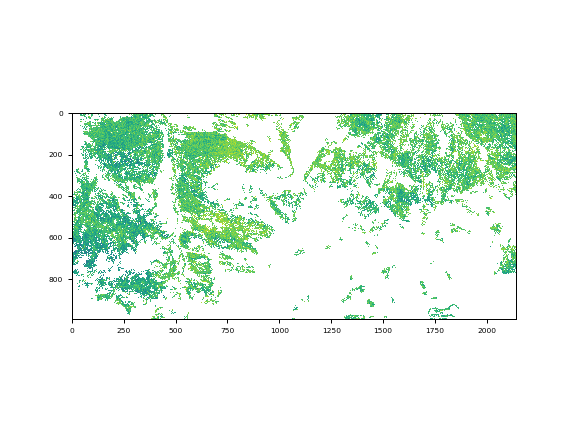

<xarray.Dataset>
Dimensions:  (x: 2140, y: 994)
Coordinates:
  * y        (y) float64 -2.085e+06 -2.085e+06 ... -2.06e+06 -2.06e+06
  * x        (x) float64 -6.494e+05 -6.494e+05 ... -7.028e+05 -7.028e+05
Data variables:
    Jan      (y, x) float32 nan nan nan nan nan ... nan nan 0.6101207 0.6147861
    Feb      (y, x) float32 nan nan nan nan nan ... nan nan 0.6690234 0.6903049
    Mar      (y, x) float32 nan nan nan nan nan ... nan nan 0.6798908 0.74314594
    Apr      (y, x) float32 nan nan nan nan nan ... nan nan 0.60360587 0.8085946
    May      (y, x) float32 nan nan nan nan nan ... nan nan 0.66239566 0.7834118
    Jun      (y, x) float32 nan nan nan nan nan ... nan nan 0.7416024 0.78071463
    Jul      (y, x) float32 nan nan nan nan ... nan nan 0.62039083 0.73038775
    Aug      (y, x) float32 nan nan nan nan ... nan nan 0.68778163 0.77969146
    Sep      (y, x) float32 nan nan nan nan nan ... nan nan 0.62381387 0.758157
    Oct      (y, x) float32 nan nan nan nan nan ... nan nan

In [68]:
# Need to assign time values to dataset

monthly_mean_entropy=dp_grassland.entropy.sel(time=slice('2017-01-01', '2017-01-31')).mean(dim='time').to_dataset(name='Jan')
monthly_mean_entropy['Feb']=dp_grassland.entropy.sel(time=slice('2017-02-01', '2017-02-28')).mean(dim='time')
monthly_mean_entropy['Mar']=dp_grassland.entropy.sel(time=slice('2017-03-01', '2017-03-31')).mean(dim='time')
monthly_mean_entropy['Apr']=dp_grassland.entropy.sel(time=slice('2017-04-01', '2017-04-30')).mean(dim='time')
monthly_mean_entropy['May']=dp_grassland.entropy.sel(time=slice('2017-05-01', '2017-05-31')).mean(dim='time')
monthly_mean_entropy['Jun']=dp_grassland.entropy.sel(time=slice('2017-06-01', '2017-06-30')).mean(dim='time')
monthly_mean_entropy['Jul']=dp_grassland.entropy.sel(time=slice('2017-07-01', '2017-07-31')).mean(dim='time')
monthly_mean_entropy['Aug']=dp_grassland.entropy.sel(time=slice('2017-08-01', '2017-08-31')).mean(dim='time')
monthly_mean_entropy['Sep']=dp_grassland.entropy.sel(time=slice('2017-09-01', '2017-09-30')).mean(dim='time')
monthly_mean_entropy['Oct']=dp_grassland.entropy.sel(time=slice('2017-10-01', '2017-10-31')).mean(dim='time')
monthly_mean_entropy['Nov']=dp_grassland.entropy.sel(time=slice('2017-11-01', '2017-11-30')).mean(dim='time')
monthly_mean_entropy['Dec']=dp_grassland.entropy.sel(time=slice('2017-12-01', '2017-12-31')).mean(dim='time')

fig = plt.figure()
plt.imshow(np.flip(monthly_mean_entropy.Nov), clim=(0,1.0))
monthly_mean_entropy

# Write output scenes to GeoTIFFs
## Output annual range and monthly mean RVI and Entropy images to GeoTIFF format

In [80]:
# write output images (in Albers) to GeoTIFF

import ogr, gdal, osr

# coordinates for lat/lon
xcoords = smoothed_grassland.isel(time=1).vv.indexes['x']
ycoords = smoothed_grassland.isel(time=1).vv.indexes['y']
yt,xt = smoothed_grassland.isel(time=1).vv.shape

MaxValX = xcoords.shape
MaxValY = ycoords.shape

# set the geoTIFF output properties in albers
xres = 25 #30 #0.00025
yres = 25 #30 #0.00025
geotransform = (xcoords[MaxValX[0]-1]-(xres*0.5), xres, 0, ycoords[MaxValY[0]-1]+(yres*0.5), 0, -yres) # offset by half the pixel size since it needs to be top-left pixel coord
#geotransform

srs = osr.SpatialReference() # establish encoding
srs.ImportFromEPSG(3577)

# loop through and monthly image
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

for month in months:
    
    filename_RVI = 'S1_RVI_Grasslands_Area3_3577_'+ month +'.tif' 
    S1_ds = gdal.GetDriverByName('GTiff').Create('/g/data/r78/cjt599/'+filename_RVI, 
                                                   xt, yt, 1, gdal.GDT_Float32)
    S1_ds.SetGeoTransform(geotransform) # specify coordinates
    S1_ds.SetProjection(srs.ExportToWkt()) # export coords to file
    # check if numpy.flip is required - xarray seems to be reverse of numpy
    S1_ds.GetRasterBand(1).WriteArray(np.flip(monthly_mean_RVI[month]).data) # write band to raster
    S1_ds.FlushCache()  # write to file
    S1_ds = None # save and close
    
    filename_entropy = 'S1_Entropy_Grasslands_Area3_3577_'+ month +'.tif' 
    S1_ds = gdal.GetDriverByName('GTiff').Create('/g/data/r78/cjt599/'+filename_entropy, 
                                                   xt, yt, 1, gdal.GDT_Float32)
    S1_ds.SetGeoTransform(geotransform) # specify coordinates
    S1_ds.SetProjection(srs.ExportToWkt()) # export coords to file
    # check if numpy.flip is required - xarray seems to be reverse of numpy
    
    S1_ds.GetRasterBand(1).WriteArray(np.flip(monthly_mean_entropy[month]).data) # write band to raster
    S1_ds.FlushCache()  # write to file
    S1_ds = None # save and close
    
# Output annual RVI and Entropy range images
filename_RVI = 'S1_RVI_Grasslands_Area3_3577_Annual_Range.tif' 
S1_ds = gdal.GetDriverByName('GTiff').Create('/g/data/r78/cjt599/'+filename_RVI, 
                                                   xt, yt, 1, gdal.GDT_Float32)
S1_ds.SetGeoTransform(geotransform) # specify coordinates
S1_ds.SetProjection(srs.ExportToWkt()) # export coords to file
# check if numpy.flip is required - xarray seems to be reverse of numpy
S1_ds.GetRasterBand(1).WriteArray(np.flip(smoothed_grassland.RVI_range).data) # write band to raster
S1_ds.FlushCache()  # write to file
S1_ds = None # save and close

# Output annual RVI and Entropy range images
filename_entropy = 'S1_Entropy_Grasslands_Area3_3577_Annual_Range.tif' 
S1_ds = gdal.GetDriverByName('GTiff').Create('/g/data/r78/cjt599/'+filename_entropy, 
                                                   xt, yt, 1, gdal.GDT_Float32)
S1_ds.SetGeoTransform(geotransform) # specify coordinates
S1_ds.SetProjection(srs.ExportToWkt()) # export coords to file
# check if numpy.flip is required - xarray seems to be reverse of numpy
S1_ds.GetRasterBand(1).WriteArray(np.flip(dp_grassland.entropy_range).data) # write band to raster
S1_ds.FlushCache()  # write to file
S1_ds = None # save and close